In [44]:
import pandas as pd

# Load the Excel file
file_path = 'Raw_Data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Data Preprocessing

# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'Age' column to numeric (assuming it contains numerical values)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert 'Amount' column to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert 'Quantity' column to numeric
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Data Refining

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows with negative values in the 'Quantity' column
df = df[df['Qty'] >= 0]

# Remove rows with negative values in the 'Amount' column
df = df[df['Amount'] >= 0]

# Assuming 'Gender' column has categorical values, you can convert it to lowercase
df['Gender'] = df['Gender'].str.lower()

# Save the processed data to a new CSV file
output_file_path = 'Processed_Data.csv'  # Replace with the desired output file path and extension
df.to_csv(output_file_path, index=False)

print("Data preprocessing and refining completed. Processed data saved to", output_file_path)


Data preprocessing and refining completed. Processed data saved to Processed_Data.csv


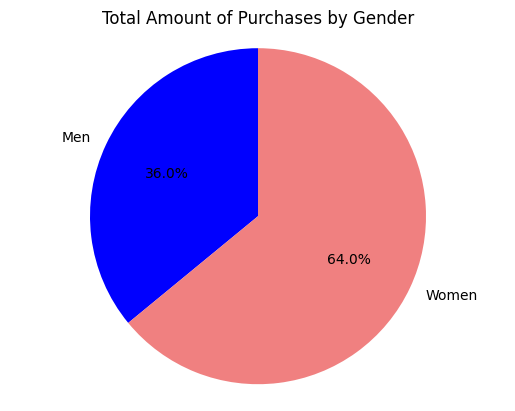

Pie chart saved as 'Men_vs_Women.png'


In [45]:
# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Raw_Data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Data Preprocessing for Amount and Gender columns
df[['Amount', 'Gender']] = df[['Amount', 'Gender']].apply(lambda x: x.str.strip() if x.dtype == "O" else x)
df[['Amount', 'Gender']] = df[['Amount', 'Gender']].apply(lambda x: x.str.lower() if x.dtype == "O" else x)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Filter rows with valid amounts
df_filtered = df.dropna(subset=['Amount', 'Gender'])

# Calculate the total amount for men and women
total_amount_by_gender = df_filtered.groupby('Gender')['Amount'].sum()

# Manually provided total amounts (replace with actual calculated values)
total_amount_men = 7613604
total_amount_women = 13562773

# Pie Chart
labels = ['Men', 'Women']
sizes = [total_amount_men, total_amount_women]
colors = ['blue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total Amount of Purchases by Gender')

# Save the pie chart as an image
image_path = 'Men_vs_Women.png'
plt.savefig(image_path)

# Show the pie chart (optional)
plt.show()

print("Pie chart saved as 'Men_vs_Women.png'")


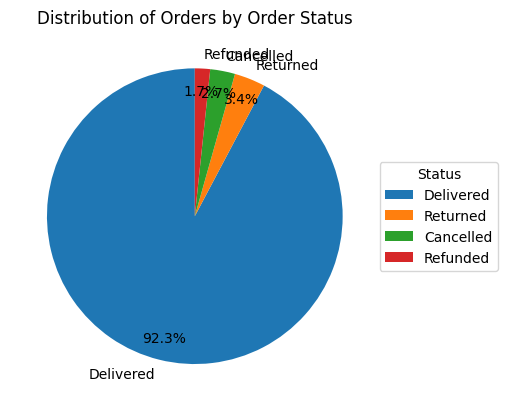

Pie chart saved as 'Status.png'


In [46]:
# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Raw_Data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Data Preprocessing for 'Amount' and 'Gender' columns
# (Assuming you have already performed the necessary preprocessing steps)

# ... (rest of the code)

# Specify the 'Order Status' values of interest
order_status_values = ['Cancelled', 'Delivered', 'Refunded', 'Returned']

# Filter data for the specified 'Order Status' values
filtered_data = df[df['Status'].isin(order_status_values)]

# Group by 'Order Status' and calculate the number of orders for each status
order_status_counts = filtered_data['Status'].value_counts()

# Generate pie chart with legend
labels = order_status_counts.index
values = order_status_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribution of Orders by Order Status')

# Add legend on the right-hand side
plt.legend(title='Status', bbox_to_anchor=(1, 0.5), loc="center left", borderaxespad=0.)

# Save the pie chart as an image
image_path = 'Status.png'
plt.savefig(image_path)

# Show the pie chart (optional)
plt.show()

print("Pie chart saved as 'Status.png'")


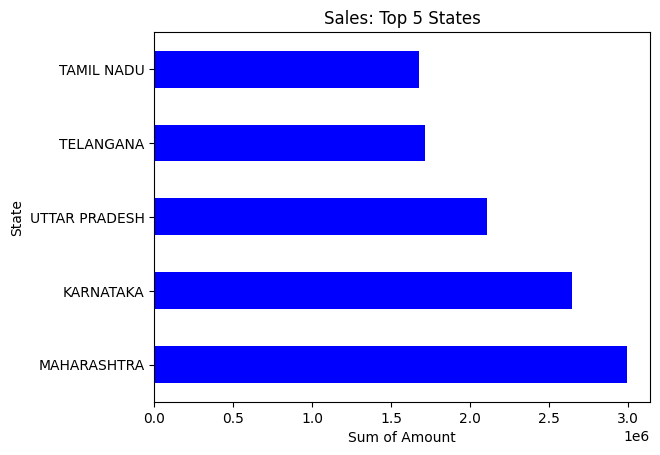

Top 5 states with the maximum sum of amounts: ship-state
MAHARASHTRA      2990221
KARNATAKA        2646358
UTTAR PRADESH    2104659
TELANGANA        1712439
TAMIL NADU       1678877
Name: Amount, dtype: int64
Bar graph saved as 'Top_5_States.png'


In [47]:
# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Raw_Data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Data Preprocessing for 'ship state' column
# (Assuming the 'Amount' column is already processed)

# ... (rest of the code)

# Group by 'ship state' and calculate the sum of amounts for each state
state_amounts = df.groupby('ship-state')['Amount'].sum()

# Find the top 5 states with the maximum sum of amounts
top_5_states = state_amounts.nlargest(5)

# Generate horizontal bar graph
fig, ax = plt.subplots()

top_5_states.plot(kind='barh', ax=ax, color='blue')

# Add labels and title
ax.set_xlabel('Sum of Amount')
ax.set_ylabel('State')
ax.set_title('Sales: Top 5 States')

# Save the bar graph as an image
image_path = 'Top_5_States.png'
plt.savefig(image_path)

# Show the bar graph (optional)
plt.show()

print("Top 5 states with the maximum sum of amounts:", top_5_states)
print("Bar graph saved as 'Top_5_States.png'")


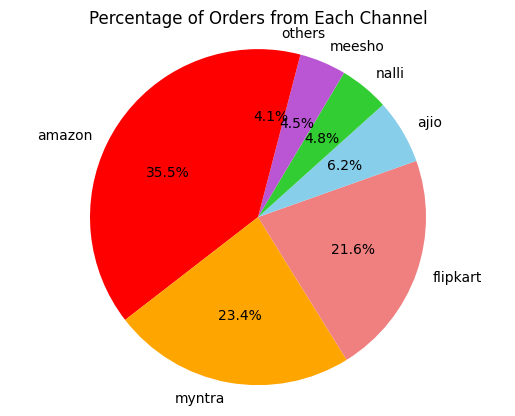

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'df'
# Replace 'path/to/Raw_Data.xlsx' with the actual file path if not loaded already
# df = pd.read_excel('path/to/Raw_Data.xlsx')

# Data Preprocessing for 'Channels' column
df['Channel '] = df['Channel '].str.strip().str.lower()

# Filter out rows with missing or empty 'Channels' values
df = df.dropna(subset=['Channel '])

# Count the number of orders for each channel
channel_counts = df['Channel '].value_counts()

# Calculate percentages
channel_percentages = channel_counts / channel_counts.sum() * 100

# Generate a list of distinct colors for each division
colors = ['red', 'orange', 'lightcoral', 'skyblue', 'limegreen', 'mediumorchid']  # Add more colors as needed

# Generate pie chart
labels = channel_percentages.index
sizes = channel_percentages.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Orders from Each Channel')
plt.show()


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'df'
# Replace 'path/to/Raw_Data.xlsx' with the actual file path if not loaded already
# df = pd.read_excel('path/to/Raw_Data.xlsx')

# Data Preprocessing for 'Age Group' and 'Gender' columns
df[['Age Group', 'Gender']] = df[['Age Group', 'Gender']].apply(lambda x: x.str.strip().str.lower())

# Assuming the data structure is similar to the provided table
# Replace 'Age Group' and 'Gender' with the actual column names

# Pivot the data to get the percentage division
pivot_data = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)
total_per_age_group = pivot_data.sum(axis=1)
percentage_data = pivot_data.div(total_per_age_group, axis=0) * 100

# Plot vertical bar graph
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# X-axis labels
age_groups = percentage_data.index
x_men = range(len(age_groups))
x_women = [x + bar_width for x in x_men]

# Plot bars for Men
bars_men = ax.bar(x_men, percentage_data['men'], width=bar_width, label='Men', color='blue')

# Plot bars for Women
bars_women = ax.bar(x_women, percentage_data['women'], width=bar_width, label='Women', color='red')

# Set the X-axis labels
ax.set_xticks([x + bar_width/2 for x in x_men])
ax.set_xticklabels(age_groups)

# Set labels and title
ax.set_ylabel('Percentage Division')
ax.set_xlabel('Age Group')
plt.title('Orders: Age vs Gender')

# Add legend
ax.legend()

# Show the bar graph
plt.show()


KeyError: "['Age Group'] not in index"